## HW4: DL Competition: Skin Cancer Detection¶
#### Project description
Skin cancer is the most common form of cancer, globally accounting for at least 40% of cancer cases. People with lighter skin are at higher risk. There are three main types of skin cancers: basal-cell skin cancer (BCC), squamous-cell skin cancer (SCC), and melanoma. Globally in 2012, melanoma occurred in 232,000 people and resulted in 55,000 deaths. Between 20% and 30% of melanomas develop from moles.

#### Task
In this project, we will develop deep learning-based solutions to classify images of skin moles into benign or malignant categories. You are limited to using fully-connected NNs only, and CNNs are not allowed in this project.

#### Data
The training and test set contains 2,637 and 660 images, respectively. The dataset is from a Kaggle Competition at https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign. The 'data' folder structure is as below

- data
    - train
        - benign
        - malignant
    - test
        - benign
        - malignant

#### Code templates
- If you have a computer with a large-size RAM (>8GB) and a fast CPU, you can download the 'standard' template and data(zip file) to work on your own computer. You need to manually unzip the data file to the folder of the code template.
 - If not, you can download the 'colab' template, and upload the code file and data zip file to your Google Drive; then open and edit the code using the Google Colab. The 3rd code cell will unzip the data file automatically.
 
#### Submission
Please submit your code with the screenshot of the last two cells' results to Bblearn.

#### Grading
- Accuracy on the test set will be used to determine the final grades.
- Students of the top five approaches will earn class certificates.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#unzip the image set. You only need to run this cell once.
#you may need to change the folders bellow
!unzip '/content/drive/MyDrive/Colab Notebooks/data.zip' -d '/content/drive/MyDrive/Colab Notebooks/'
print('unziped the image set to /content/drive/MyDrive/Colab Notebooks/')

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/data.zip, /content/drive/MyDrive/Colab Notebooks/data.zip.zip or /content/drive/MyDrive/Colab Notebooks/data.zip.ZIP.
unziped the image set to /content/drive/MyDrive/Colab Notebooks/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

### 1. Data preparation

In [ ]:
import os
from PIL import Image

#1.1 get image lists
train_b = '/content/drive/MyDrive/data/train/benign'
train_m = '/content/drive/MyDrive/data/train/malignant'

test_b = '/content/drive/MyDrive/data/test/benign'
test_m = '/content/drive/MyDrive/data/test/malignant'

def getImList(folder):
    # get the list of file names in 'folder'
    imList = os.listdir(folder) # get all names
    fPath = [os.path.join(folder, fName) for fName in imList] # add path to names
    
    return fPath

trainList_b = getImList(train_b)
trainList_m = getImList(train_m)
trainList = trainList_b + trainList_m
print("# training images:", len(trainList))

testList_b = getImList(test_b)
testList_m = getImList(test_m)
testList = testList_b + testList_m
print("# test images:", len(testList))

#1.2 load all images
read = lambda imName: np.asarray(Image.open(imName).convert("RGB"))
print('loading images ...')
X_train = [read(name) for name in trainList]
X_train = np.array(X_train, dtype='uint8')/255
print('.   training set shape:', X_train.shape)

X_test = [read(name) for name in testList]
X_test = np.array(X_test, dtype='uint8')/255
print('.   test set shape:', X_test.shape)

print('loading ended.')

# 1.3 Create target labels
y_benign_train = np.zeros(len(trainList_b))
y_malignant_train = np.ones(len(trainList_m))
y_train = np.concatenate((y_benign_train, y_malignant_train), axis = 0)
print('.    training target shape: ', y_train.shape)
y_benign_test = np.zeros(len(testList_b))
y_malignant_test = np.ones(len(testList_m))
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)
print('.    test target shape', y_test.shape)

# 1.4 Shuffle data
print('shuffling data ...')
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

print('Dataset is ready for using.')

# training images: 2637
# test images: 660
loading images ...
.   training set shape: (2637, 224, 224, 3)
.   test set shape: (660, 224, 224, 3)
loading ended.
.    training target shape:  (2637,)
.    test target shape (660,)
shuffling data ...
Dataset is ready for using.


In [ ]:
#reshape images to vectors
X_train_1 = np.reshape(X_train, [X_train.shape[0], X_train.shape[1] * X_train.shape[2]*3])
X_test_1 = np.reshape(X_test, [X_test.shape[0], X_test.shape[1] * X_test.shape[2]*3])
y_train_onehot = keras.utils.to_categorical(y_train)

print(X_train_1.shape, X_test_1.shape)

(2637, 150528) (660, 150528)


### 2. Construct a fully-connected deep NN

In [ ]:
# Create a fc NN
def buildModel(input_dims, out_dims):
    '''construct your model in this function
    
        return model
    '''
    model = keras.models.Sequential()

    ## add your code here
    #-----------------------------------------------------
    # hidden layers
    model.add(keras.layers.Dense(1352, input_dim = 150528, activation = "relu"))
    model.add(keras.layers.Dense(500, activation = "relu"))
    model.add(keras.layers.Dense(500, activation = "relu"))
    model.add(keras.layers.Dense(500, activation = "relu" ))
    model.add(keras.layers.Dense(500, activation = "relu" ))
        
    # output layer
    model.add(keras.layers.Dense(2, activation = "softmax"))

    # compile
    model.compile(loss = "binary_crossentropy", optimizer='adam', metrics = ["accuracy"])
    
    #------------------------------------------------------
    return model

model = buildModel(input_dims=X_train_1.shape[1], out_dims = 2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1352)              203515208 
                                                                 
 dense_1 (Dense)             (None, 500)               676500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 204,944,210
Trainable params: 204,944,210


### 3. Train and evaluate the model

In [ ]:
#3.1 train the model
#history = model.fit(...)
## add your code here
#-----------------------------------------------------
# The Best One
history = model.fit(X_train_1, y_train_onehot, batch_size = 63, epochs = 180, validation_split = 0.25)

#------------------------------------------------------

Epoch 1/180
32/32 [==============================] - 8s 137ms/step - loss: 12.1626 - accuracy: 0.4841 - val_loss: 1.7243 - val_accuracy: 0.5379
Epoch 2/180
32/32 [==============================] - 4s 125ms/step - loss: 1.3287 - accuracy: 0.5432 - val_loss: 0.7144 - val_accuracy: 0.6258
Epoch 3/180
32/32 [==============================] - 4s 132ms/step - loss: 0.6577 - accuracy: 0.6171 - val_loss: 0.6526 - val_accuracy: 0.6652
Epoch 4/180
32/32 [==============================] - 4s 125ms/step - loss: 0.6390 - accuracy: 0.6439 - val_loss: 0.5899 - val_accuracy: 0.6409
Epoch 5/180
32/32 [==============================] - 4s 126ms/step - loss: 0.5791 - accuracy: 0.6894 - val_loss: 0.6480 - val_accuracy: 0.6076
Epoch 6/180
32/32 [==============================] - 4s 123ms/step - loss: 0.5274 - accuracy: 0.7243 - val_loss: 0.5047 - val_accuracy: 0.7545
Epoch 7/180
32/32 [==============================] - 4s 124ms/step - loss: 0.5189 - accuracy: 0.7289 - val_loss: 0.5345 - val_accuracy: 0.747

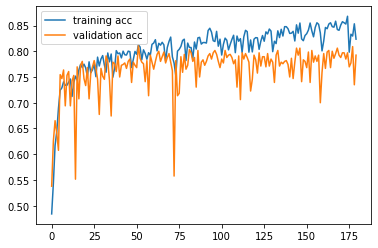

In [ ]:
#3.2 Show the curves of the training and test accuracies
training_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

plt.plot(training_accs)
plt.plot(val_accs)
plt.legend(['training acc', 'validation acc'])

In [ ]:
#3.3 test the model
y_train_pred_onehot = model.predict(X_train_1)
y_train_pred = np.argmax(y_train_pred_onehot, axis =1)

train_err = np.sum(y_train == y_train_pred)/y_train.shape[0]
print('training acc is {}%'.format(np.round(train_err*100, 3)))

y_test_pred_onehot= model.predict(X_test_1)
y_test_pred = np.argmax(y_test_pred_onehot, axis =1)
test_err = np.sum(y_test == y_test_pred)/y_test.shape[0]
print('test acc is {}%'.format(np.round(test_err*100, 3)))

training acc is 85.21%
test acc is 81.97%


In [ ]:
# 3.4 save the model
import shutil

model.save("/content/drive/MyDrive/Colab Notebooks/Best_Accuracy")
shutil.make_archive("/content/drive/MyDrive/Colab Notebooks/Best_Accuracy", "zip", "/content/drive/MyDrive/Colab Notebooks/Best_Accuracy")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Best_Accuracy/assets


'/content/drive/MyDrive/Colab Notebooks/Best_Accuracy.zip'